# Calculation of relevant variables for a seafloor monitoring system. 
The system is comprised of a small vehicle attached via a tether to a drum mounted on a lander.
Assuming the vehicle is pulling the tether tight, it will follow a circle involute. Hereby the involute path will depend on certain parameters such as drum radius and tether length. 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

There are several parameters which either need to be predefined or computed to determine the exact characteristics of the vehicles circle involute path. Specifically there are three parameters, which are interdependent: The drum radius $R_d$, the length of the cable/tether $L_c$ and the area that can be covered $A_s$ (approximated as a circle with the radius $r_f$ of the final distance of the involute path to the origin). Based on this assumption the area can be approximated by using $r_f$, which is computed as:
$$
r_f = \sqrt{L_c^2 + R_d^2}
$$
and the resulting approximate area can be then computed by:
$$
A_s = \pi r_f^2 = \pi \left(L_c^2 + R_d^2 \right)
$$
which includes all three relevant variables.
The following script computes the the third variable based on the definition of the other two. 

In [3]:
# string to define what to calculate:
#   area - approx. area given drum radius and cable length
#   length - cable length given drum radius and approx area
#   radius - drum radius given approx. area and cable length
calculateWhat = "length"
Rd = 0.2            # drum radius [m]
Lc = 6.0          # length of cable [m]
As_approx = 1000.0   # approximate area as a circle [m]

if calculateWhat == "area":
    As_approx = np.around(np.pi * (np.power(Lc, 2) + np.power(Rd, 2)), decimals=3)
    print(f"With Rd = {Rd} m and Lc = {Lc} m:\
    \n" + "\033[1m" + f"As = {As_approx} m^2" + "\033[0m")
elif calculateWhat == "length":
    Lc = np.around(np.sqrt(As_approx / np.pi - np.power(Rd, 2)), decimals=3)
    print(f"With Rd = {Rd} m and As = {As_approx} m^2:\
    \n" + "\033[1m" + f"Lc = {Lc} m" + "\033[0m")
elif calculateWhat == "radius":
    Rd = np.around(np.sqrt(As_approx / np.pi - np.power(Lc, 2)), decimals=3)
    print(f"With As = {As_approx} m^2 Lc = {Lc} m:\
    \n" + "\033[1m" + f"Rd = {Rd} m" + "\033[0m")

With Rd = 0.2 m and As = 1000.0 m^2:    
Lc = 17.84 m


Another important parameter is the spacing $S_r$ between different revolutions of the path (orthotogonal spacing is constant for circle involutes). Once the drum diameter has been defined the spacing can be computed as 
$$
S_r = 2 \pi R_d
$$

In [4]:
Sr = np.around(2.0 * np.pi * Rd, decimals=3)
print(f"With Rd = {Rd}: \n" + "\033[1m" + f"Sr = {Sr} m" + "\033[0m")

With Rd = 0.2: 
Sr = 1.257 m


Assuming a polar coordinate system with origin on the center of the drum, the circle involute path can be described by:

$$
r = R_d \sqrt{1 + \alpha^2} \\
\phi = \alpha - atan{(\alpha)}
$$

where $r$ is the current distance from origin to the end of the involute path, $\phi$ is the current angle of the end of the involute path relative to the origin, and $\alpha$ is the angle of the tangent, which is formed by drum and taught tether. 
The polar coordinates $(r, \phi)$ can be transformed into cartesian coordinates via:

$$
x = r \cos{(\phi)} = R_d \sqrt{1 + \alpha^2} \cos{\left(\alpha - atan{(\alpha)}\right)} \\
y = r \sin{(\phi)} = R_d \sqrt{1 + \alpha^2} \sin{\left(\alpha - atan{(\alpha)}\right)}
$$

The following figure shows the resulting circle involute path (based on the above parameters) the vehicle would follow, if the tether is maintained under tension at all times. The visualization makes use of the following equation to determine the total angle of the fully unwound tether:
$$
\alpha_f = \sqrt{\left(\frac{r_f}{R_d}\right)^2 - 1}
$$

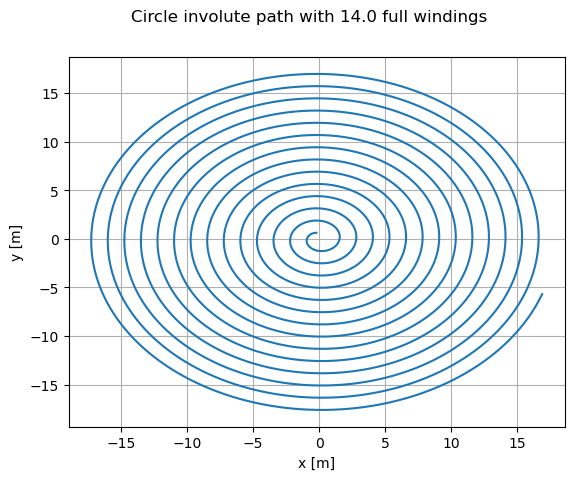

In [5]:
r_f = np.sqrt(np.power(Lc, 2) + np.power(Rd, 2))
alpha_f = np.sqrt(np.power(r_f / Rd, 2) - 1.0)
nr_w = alpha_f // (2.0 * np.pi)
alpha_start = np.deg2rad(180.0)
alpha = np.linspace(alpha_start, alpha_f, num=5000)
x = Rd * np.sqrt(1 + alpha**2) * np.cos(alpha - np.arctan(alpha))
y = Rd * np.sqrt(1 + alpha**2) * np.sin(alpha - np.arctan(alpha))

plt.suptitle(f"Circle involute path with {nr_w} full windings")
plt.plot(x, y)
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.grid()

Additionally, payload specific parameters can be calculated, which will inform vehicle specific parameters, such as the vehicle speed along the path $v_{\Vert}$. 

Assuming a camera as the payload of interest, we can determine an angular field of view of the camera $\beta$, which will be different along the path $\beta_{\Vert}$ and across the path $\beta_{\bot}$. Given a specific and constant altitude $h$ we can calculate the camera footprint along the path $b_{\Vert}$ with:

$$
b_\Vert = 2 h ~ \tan{\left(\frac{\beta_\Vert}{2}\right)}
$$

Now we also define the number of views per sample point $n_s$, (i.e. how often a specific point should be sampled by the camera to stitch images together or to use optical flow), and the sampling frequency of the camera $f_s$. 
Then we can compute the necessary velocity component along the path as:

$$
v_\Vert = \frac{b_\Vert}{n_s f_s^{-1}}
$$

In [6]:
beta = np.deg2rad(35.0)     # ang. FOV of camera [rad]
h = 2.0                     # target altitude [m]
# camera footprint along path [m]
b_along = np.around(2.0 * h * np.tan(beta / 2.0), decimals=3)
ns = 5.0                    # number of views per sample point
fs = 1.0                    # sampling frequency [Hz]
Ts = 1 / fs                 # sampling period [s]
# vehicle speed based on camera footprint and sampling (along the path)
v_along = np.around(b_along / (ns * Ts), decimals=3)   # [m/s]
print(f"With b_along = {b_along} m, fs = {fs} Hz and ns = {ns}\
\n" + "\033[1m" + f"v_along = {v_along} m/s" + "\033[0m")

With b_along = 1.261 m, fs = 1.0 Hz and ns = 5.0
v_along = 0.252 m/s


With $v_\Vert$ we can now compute the time it will take for the survey to finish:

$$
t_{survey} = \frac{L_c^2}{2 R_d v_\Vert}
$$

In [7]:
# surve time [s]
t_survey = np.around(np.power(Lc, 2) / (2.0 * Rd * v_along), decimals=3)
print(f"With Lc = {Lc} m, Rd = {Rd} m and v_along = {v_along} m/s\
      \n" + "\033[1m" + f"t_survey = {np.around(t_survey / 60.0, decimals=2)} min" + "\033[0m")

With Lc = 17.84 m, Rd = 0.2 m and v_along = 0.252 m/s      
t_survey = 52.62 min


Additionally, it is possible to compute the total path length $L_{path}$ for a given involute using:

$$
L_{path} = \frac{L_c^2}{2 R_d}
$$

In [8]:
L_path = np.around(np.power(Lc, 2) / (2.0 * Rd))
print(f"With Lc = {Lc} m, and Rd = {Rd} m\
     \n" + "\033[1m" + f"L_path = {L_path} m" + "\033[0m")

With Lc = 17.84 m, and Rd = 0.2 m     
L_path = 796.0 m


To better understand the dependency between different design variables, we can visualize the relation between drum diameter $R_d$, survey area $A_s$ and length of the survey path $L_{path}$, as well as, the relation between altitude $h$, angular field of view $\beta$ and footprint $b$ as following:

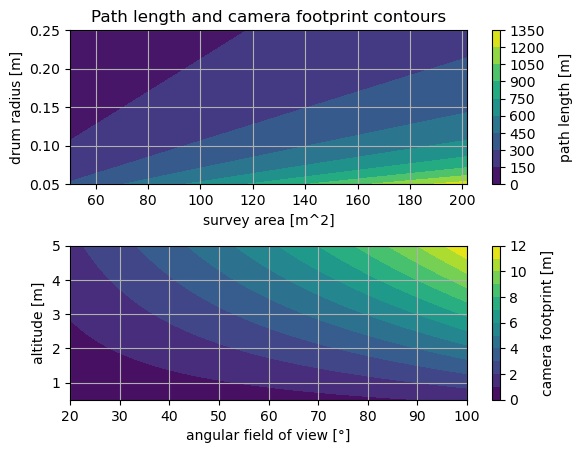

In [9]:
# path length contours
Lc_range = np.linspace(4.0, 8.0, 2000)
Rd_range = np.linspace(0.1, 0.5, 2000)
As_range = np.pi * (np.power(Lc_range, 2) + np.power(Rd_range, 2))
As_grid, Rd_grid = np.meshgrid(As_range, Rd_range / 2.0)
Lp_range = np.power(np.sqrt(As_grid * 2.0 / np.pi - np.power(Rd_grid, 2)), 2) / (2.0 * Rd_grid)

# camera footprint
h_range = np.linspace(0.5, 5.0, 2000)
beta_range = np.linspace(20.0, 100.0, 2000)
beta_grid, h_grid = np.meshgrid(beta_range, h_range)
b_range = 2.0 * h_grid * np.tan(np.deg2rad(beta_grid) / 2.0)

# plotting
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.set_title(f"Path length and camera footprint contours")
cp = ax1.contourf(As_grid, Rd_grid, Lp_range, 10)
cb = fig.colorbar(cp, ax=ax1)
cb.ax.set_ylabel('path length [m]', labelpad=10)
ax1.set(xlabel="survey area [m^2]", ylabel="drum radius [m]")
ax1.grid()

cp2 = ax2.contourf(beta_grid, h_grid, b_range, 12)
cb2 = fig.colorbar(cp2, ax=ax2)
cb2.ax.set_ylabel('camera footprint [m]', labelpad=10)
ax2.set(xlabel="angular field of view [°]", ylabel="altitude [m]")
ax2.grid()

plt.subplots_adjust(hspace=0.4)